# Risk

To understand risk we are going to start with simulated data. The code below can just be run and it will create some data to be used in this process.

In [1]:
import numpy as np

#Create the market returns
np.random.seed(1)
market_returns = np.random.normal(0.000325, .02, 500)

With market returns, we could simulate the hypothetical path. If our market that these returns represent was worth $100, then the following code is going to represent its evolution over time.

In [2]:
#Use P to denote current price
P = 100

#The ts variable will hold the time series of the asset price, at time 0 it is equal to P
ts = [P]

#Iterate through all the returns
for r in market_returns:
    #The new market value is P * (1+r)
    P = P * (1+r)
    
    #Append to the time series
    ts.append(P)

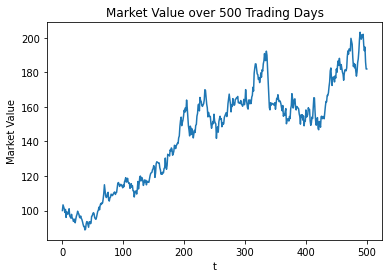

In [3]:
import matplotlib.pyplot as plt

#Graphically it looks like this
plt.plot(range(len(ts)),ts)
plt.xlabel("t")
plt.ylabel("Market Value")
plt.title("Market Value over 500 Trading Days")
plt.show()

Holding period return is equal to either of the following, the final ending price divided by the starting price or the multiplication of all the returns plus 1, with one subtracted after the multiplication:

$$ HP_t = \frac{P_t}{P_0} - 1$$

$$ HP_t = [\prod_{i=1}^{N} (1+r_i)] - 1$$

where

$$ P_i = \text{The asset price at time i} $$

$$ r_i = \text{The return at time i} $$

$$ N = \text{The number of returns} $$

In [4]:
#Method 1
HPR = ts[-1] / ts[0] - 1
print(HPR)

0.819970400153097


In [5]:
from numpy import prod

#Method 2
#We can use prod from numpy
HPR = prod([r+1 for r in market_returns]) - 1
print(HPR)

0.8199704001530996


## Daily Returns

There are two different but similar ways to think about a daily return. There is a simple arithmetic mean which is the average of daily returns, and then there is the geometric mean which tells us what the daily returns would have to be every day for us to get to the holding period return.

### Simple Arithmetic Mean

$$ \mu = \frac{\sum_{i=1}^{N} r_i}{N}$$

where

$$ \mu = \text{Simple arithmetic mean} $$

$$ N = \text{Number of returns} $$

$$ r_i = \text{The return at time i} $$

### Geometric Mean

$$ (1 + HPR)^{\frac{1}{N}} - 1$$

$$ \mu = \text{Geometric mean} $$

$$ N = \text{Number of returns} $$

$$ HPR = \text{Holding Period Return} $$

In [6]:
#Find the simple arithmetic mean
print(sum(market_returns) / len(market_returns))

0.001393737885126131


In [7]:
#Find the simple geometric mean
print((HPR+1) ** (1/len(market_returns))-1)

0.0011983579323520122


These two are not going to be the same for reasons we won't fully cover now, but for now just try and remember that there are both of these ways to view a daily return.

## Variance and Standard Deviation

The standard deviation of a stock return is a classic metric of volatility. What it will tell us is how far spread apart returns are from the mean. A low standard deviation means that a particular stock tends to have consistent returns, where as a high standard deviation would tell us that returns may be erratic.

There are two ways to think about variance, population and sample variance. The population variance is meant to be used when looking at population data, where as the sample variance is used when looking at sample data. The standard deviation has the same convection. The equations are:

$ \sigma^2 = \frac{\Sigma (X_{i}-\bar{X})^2}{N}$

$ S^2 = \frac{\Sigma (X_{i}-\bar{X})^2}{N-1}$

$ \sigma = \sqrt{\frac{\Sigma (X_{i}-\bar{X})^2}{N}}$

$ S = \sqrt{\frac{\Sigma (X_{i}-\bar{X})^2}{N-1}}$

where

$ \sigma^2 = \text{Population Variance} $

$ S^2 = \text{Sample Variance} $

$ \sigma = \text{Population Standard Deviation} $

$ S = \text{Sample Standard Deviation} $

$ X_{i} = \text{The ith value} $

$ \bar{X} = \text{Average value} $

$ N = \text{Number of observations} $

To find the variance of our returns, the first thing we need to do is find the daily mean (arithmetic) and then find the deviations from the daily mean for all points.

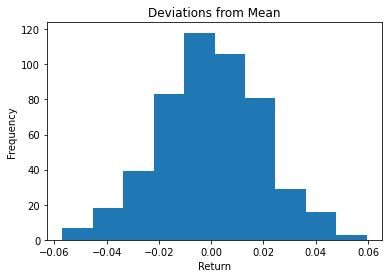

In [8]:
#Find the daily mean
mu = sum(market_returns) / len(market_returns)

#Find the deviations
deviations = [r-mu for r in market_returns]

#Plot the deviations
plt.hist(deviations)
plt.title("Deviations from Mean")
plt.ylabel("Frequency")
plt.xlabel("Return")
plt.show()

Step number two is to square all these deviations.

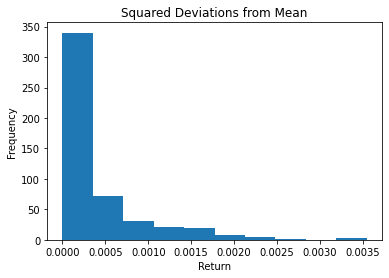

In [9]:
#Find the squared deviations
deviations_squared = [d**2 for d in deviations]

#Plot the squared deviations
plt.hist(deviations_squared)
plt.title("Squared Deviations from Mean")
plt.ylabel("Frequency")
plt.xlabel("Return")
plt.show()

For the population and sample variance, we need the sum of this divided by either N or N-1.

In [10]:
#Population variance
var_pop = sum(deviations_squared) / len(deviations_squared)
print(var_pop)

0.0003907803548072633


In [11]:
#Sample variance
var_samp = sum(deviations_squared) / (len(deviations_squared) - 1)
print(var_samp)

0.00039156348177080494


The function var in numpy has the ability to just as easily calculate the variance. It will return the population variance.

In [12]:
#Use numpy to find the population variance
print(np.var(market_returns))

0.00039078035480726335


To get the sample variance, you need to give the argument ddof=1 which stands for delta degrees of freedom. It will take one away from the denominator.

In [13]:
#Use numpy to find the sample variance
print(np.var(market_returns, ddof=1))

0.000391563481770805


Getting the standard deviation just means taking the square root of variance.

In [14]:
#Find the standard deviation
std_pop = var_pop ** .5
std_samp = var_samp ** .5
print(std_pop)
print(std_samp)

0.019768165185653
0.019787963052593487


We can use numpy to find the standard deviation as well.

In [15]:
#Find the standard deviation with numpy
std_pop = np.std(market_returns)
std_samp = np.std(market_returns, ddof=1)
print(std_pop)
print(std_samp)

0.019768165185653
0.019787963052593487


## Annualizing Metrics

When we talk about equity markets, we often quote things in terms of an annual basis. We don't want the daily return but rather we want the annual return. The same goes for the measures of risk. Let's examine how we annualize both.

### Annualized Return

As we saw from prior lessons, annualizing a return can be done by taking the HPR and applying this formula:

$$ CAGR = (HPR + 1)^{1/t} - 1$$

where

$ CAGR = \text{Compound Annual Growth Rate} $

$ HPR = \text{Holding Period Return} $

$ t = \text{The number of years for the HPR} $

There is one caveat when using equity returns... there are not returns on weekends or trading holidays! So you can't just take the number of days and divide by 365. Instead you will need to do one of two things:

1. Find the number of days between the first and last return and divide this number by 365.
2. Divide the total number of days with returns by an approximation for the number of trading days like 252.

In the example, there were no dates given so we won't be able to do it the first way. Instead we assume 252 trading days. So the number of years for our sample can be calculated below as:

In [16]:
#Calculate number of years
t = len(market_returns) / 252
print(t)

1.9841269841269842


With the number of years handy, we just need to apply the formula.

In [17]:
#Find the CAGR
CAGR = (1 + HPR) ** (1/t) - 1
print(CAGR)

0.3522980433642162


### Annualizing Variance

Variance has the following property in math which makes this piece easier when we are sampling N days:

$$ VAR(X_N) = N \cdot VAR(X) $$

where

$ N = \text{Number of samples} $

$ X = \text{Asset X} $

$ X_N = \text{N samples of asset X} $


It applys in a parallel way to standard deviation where the c comes out as a square root:

$$ STD(X_N) = \sqrt{N} \cdot STD(X) $$

where

$ N = \text{Number of samples} $

$ X = \text{Asset X} $

$ X_N = \text{N samples of asset X} $

To annualize these risk metrics, we want to see what the variance is with a year of trading days. Again we use the approximation of 252.

$$ VAR( \cdot X_{252}) = 252 \cdot VAR(X) $$

$$ STD( \cdot X_{252}) = \sqrt{252} \cdot STD(X) $$

So for the annual standard deviation and variance, the code below shows the simple constants that we must multiply in.

In [18]:
#Find the annual variance + standard deviation
var_pop_annual = var_pop * 252
std_pop_annual = std_pop * 252 ** .5

print(var_pop_annual)
print(std_pop_annual)

0.09847664941143035
0.31380989374369694


Once again, just ignore the code below since it is setting up for the next part of the lesson.

In [19]:
#Create the stock return
np.random.seed(2)
stock_returns = np.random.normal(0.0001, .01, 500) + .8 * market_returns

#Use P to denote current price
P = 100

#The ts variable will hold the time series of the asset price, at time 0 it is equal to P
ts_stock = [P]

#Iterate through all the returns
for r in stock_returns:
    #The new stock value is P * (1+r)
    P = P * (1+r)
    
    #Append to the time series
    ts_stock.append(P)

## Covariance

In financial markets, we can expect that to some extent assets are going to move together. Below, we have a simulated stock price. We will begin seeing what its relationship to the broader market is.

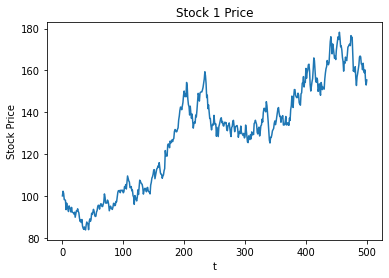

In [20]:
plt.plot(range(len(ts_stock)),ts_stock)
plt.xlabel("t")
plt.ylabel("Stock Price")
plt.title("Stock 1 Price")
plt.show()

How does it look compared to the overall market returns?

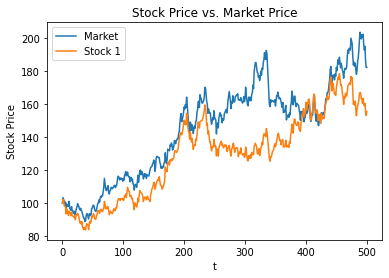

In [21]:
#Compare to the market returns
plt.plot(range(len(ts)), ts, label="Market")
plt.plot(range(len(ts_stock)), ts_stock, label="Stock 1")
plt.xlabel("t")
plt.ylabel("Stock Price")
plt.title("Stock Price vs. Market Price")
plt.legend()
plt.show()

The first thing we might ask when comparing these two is what is the difference between their HPR? We can easily find it below.

In [22]:
#Compute HPR
HPR_market = ts[-1] / ts[0] - 1
HPR_stock = ts_stock[-1] / ts_stock[0] - 1
print("Market HPR: {}".format(HPR_market))
print("Stock HPR: {}".format(HPR_stock))

Market HPR: 0.819970400153097
Stock HPR: 0.5537312068060418


What about standard deviations?

In [23]:
#Compute standard deviation
sd_market = np.std(market_returns)
sd_stock = np.std(stock_returns)
print("Market Standard Dev: {}".format(sd_market))
print("Stock Standard Dev: {}".format(sd_stock))

Market Standard Dev: 0.019768165185653
Stock Standard Dev: 0.018626116756718335


And daily return.

In [24]:
#Compute mean daily return
mu_market = np.mean(market_returns)
print(mu_market)
mu_stock = np.mean(stock_returns)
print(mu_stock)

0.0013937378851261314
0.0010548547453429593


## Covariance

Covariance measures the way in which two things move together or opposite one and other. These values need to be paired up, so when we look at stock returns over time, for example, we compare each dates stock returns! Or in our case the market and the stock returns. The formulas are:

Population Covariance:

$ COV(X, Y) = \frac{\Sigma (X_{i} - \bar{X})(Y_{i} - \bar{Y})}{N} $

Sample Covariance:

$ COV(X, Y) = \frac{\Sigma (X_{i} - \bar{X})(Y_{i} - \bar{Y})}{N-1} $

where

$ X_{i} = \text{The ith value of X} $

$ \bar{X} = \text{Average value of X} $

$ Y_{i} = \text{The ith value of Y} $

$ \bar{Y} = \text{Average value of Y} $

$ N = \text{The number of pairs of observations} $

First, we could find the covariance manually.

In [25]:
#Let's find covariance manually

#Find the deviations
deviations_market = [r - mu_market for r in market_returns]
deviations_stock = [r - mu_stock for r in stock_returns]

#Multiply each deviation by eachother and sum then divide by N or N-2
cov_sample = sum([x*y for x,y in zip(deviations_market, deviations_stock)]) / (len(market_returns) - 1)
cov_population = sum([x*y for x,y in zip(deviations_market, deviations_stock)]) / (len(market_returns))

print(cov_sample)
print(cov_population)

0.00030720450305014174
0.00030659009404404147


If you use numpy's covariance function you will get back a covariance matrix between the two assets. The i=0, j=0 cell will be the variance for the first asset, i=1, j=1 will be the variance for the second asset, and then the other two cells are going to be the covariance between the two assets.

In [26]:
#Or find it with numpy, it returns a covariance matrix
print(np.cov(market_returns,stock_returns))

[[0.00039156 0.0003072 ]
 [0.0003072  0.00034763]]


If you index in with [0][1] we can get that covariance between the two assets.

In [27]:
#Find the covariance
print(np.cov(market_returns,stock_returns)[0][1])

0.00030720450305014163


The default version returns the sample covariance but we could change it to be the population covariance with ddof=0.

In [28]:
#Find the population covariance
print(np.cov(market_returns,stock_returns, ddof=0)[0][1])

0.00030659009404404136


## Correlation

The correlation is a number between -1 and 1 which represents how closely related two assets are. A correlation of 1 means that for every change in one asset the second one will have the same change times some constant c (so it could be that for every percent return in asset 1, asset 2 returns twice that exactly). A negative correlation would mean that the other asset gets some sort of an opposite reaction. The formula to find correlation is:

$$ \rho = \frac{COV(X, Y)}{\sigma_X \sigma_Y}$$

where

$$ \rho = \text{Correlation} $$

$$ COV(X, Y) = \text{Covariance between X and Y} $$

$$ \sigma_X = \text{The standard deviation of X} $$

$$ \sigma_Y = \text{The standard deviation of Y} $$

There are two ways that we could find the correlation, either dividing covariance by both standard deviations or by getting the correlation matrix.

In [29]:
corr = np.cov(market_returns,stock_returns, ddof=0)[0][1] / (np.std(market_returns, ddof=0) * np.std(stock_returns, ddof=0))
print(corr)

corr = np.corrcoef(market_returns, stock_returns)[0,1]
print(corr)

0.8326633246824368
0.8326633246824369


## Beta

Beta is a measure of how reactive a stock's returns are going to be market returns. A stock with a beta of one would mean that on average when there is a 1% return in the market, we expect that the stock will go up by 1% on average. A .5 beta would mean we expect the stock might go up by .5% on average, and 2 would imply a 2% return on average.

Beta can be found with the following formula:

$$ \beta = \frac{COV(S, M)}{\sigma^2_M} $$

where

$$ \beta = \text{Beta} $$

$$ COV(S, M) = \text{The covariance between the stock and market} $$

$$ \sigma^2_M = \text{The variance of the market} $$


Now we can find the beta.

In [30]:
#To calculate Beta 
beta = np.cov(market_returns, stock_returns, ddof=0)[0][1] / np.var(market_returns, ddof=0)
print(beta)

0.7845586152744413


We are able to break down volatility into two measures if we want: the market risk and the idiosyncratic risk. The market risk is the risk that comes from general market exposure and then there is idiosyncratic risk which is the rest of the risk that is unrelated to general market risk conditions. Variance can be broken down as the following:

$$ \sigma^2_A = \beta_A^2 \sigma^2_M + \sigma^2_{A-I} $$

where 

$ \sigma^2_A = \text{Variance of asset A} $

$ \beta_A = \text{Beta of asset A} $

$ \sigma^2_M = \text{Variance of market} $

$ \sigma^2_{A-I} = \text{Variance of the idiosnycratic part of asset A's returns} $

The first term on the right hand side is the variance from the market, and the second term is what is left over as risk unrelated to the market.

In [31]:
#Calculate volatility that comes from the market
market_vol = beta**2*np.var(market_returns)
print(market_vol)

0.0002405378996400538


In [32]:
#Calculate volatility from idiosyncratic risk
idio_vol = np.var(stock_returns)-market_vol
print(idio_vol)

0.00010639432579484973


The calculations above show that a large amount of the risk in this stock is coming from the market. More than 2/3 of the risk can be attributed to its relationship to the market, the rest is risk specific to the stock.

You can ignore the code below as it will just be for setting up our data mmoving foward.

In [33]:
np.random.seed(3)
betas = np.random.normal(1, .15, 100)
vols = np.random.normal(.03, .005, 100)
stock_returns = [market_returns * beta + np.random.normal(0, vol, 500) for beta, vol in zip(betas, vols)]

We have stock returns now which is 100 different stock returns. As a first step, let's find the average volatility of each random stock versus the volatility of the market. We will see below that picking a random stock leads to a much bigger volatility on average than the volatility of the market.

In [34]:
print(np.mean([np.std(x) for x in stock_returns]))
print(np.std(market_returns))

0.0356430155025617
0.019768165185653


We may also be interested in seeing the computed betas (if you understood the code that generates the data, you will notice the betas are not exactly the same, don't worry this is normal because noise can distort the true measures).

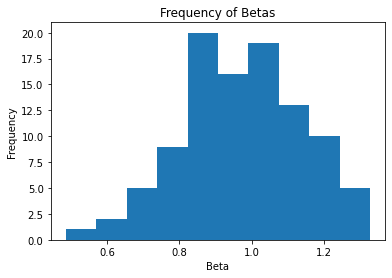

In [35]:
#Get the betas of our stock
betas = [np.cov(market_returns, r, ddof=0)[0][1] / np.var(market_returns, ddof=0) for r in stock_returns]

#Plot the betas
plt.hist(betas)
plt.xlabel("Beta")
plt.ylabel("Frequency")
plt.title("Frequency of Betas")
plt.show()

## Building Portfolios

Let's imagine for a second that we can build portfolios that automatically rebalance each day to a set allocation. I am making this assumption to avoid issues with stocks getting much bigger or smaller than their original allocation. What might a portfolio look like in comparison to the other two stocks on their own? Let's take a look at our first two stocks and get some statistics on them.

In [36]:
#Get the first two sets of stock returns
r1 = stock_returns[0]
r2 = stock_returns[1]

#Print out statistics on them
print("Mean Daily Return:")
print("Stock 1: {}".format(np.mean(r1)))
print("Stock 2: {}".format(np.mean(r2)))
print()
print("Standard Deviation:")
print("Stock 1: {}".format(np.std(r1)))
print("Stock 2: {}".format(np.std(r2)))
print()
print("Correlation:")
print(np.corrcoef(r1, r2)[0,1])

Mean Daily Return:
Stock 1: 0.0037979364715901988
Stock 2: 0.00042731018644079973

Standard Deviation:
Stock 1: 0.042180184985796475
Stock 2: 0.032071094066450916

Correlation:
0.3468854183341703


What about a portfolio of 50%/50% these two, what is the return and standard deviation then?

In [37]:
portfolio_returns = r1 * .5 + r2 * .5

print("Mean Daily Return:")
print("Stock 1: {}".format(np.mean(r1)))
print("Stock 2: {}".format(np.mean(r2)))
print("Portfolio: {}".format(np.mean(portfolio_returns)))
print()
print("Standard Deviation:")
print("Stock 1: {}".format(np.std(r1)))
print("Stock 2: {}".format(np.std(r2)))
print("Portfolio: {}".format(np.std(portfolio_returns)))
print()

Mean Daily Return:
Stock 1: 0.0037979364715901988
Stock 2: 0.00042731018644079973
Portfolio: 0.0021126233290154985

Standard Deviation:
Stock 1: 0.042180184985796475
Stock 2: 0.032071094066450916
Portfolio: 0.03060323415999265



The returns is equal to the average of the two, but the standard deviation is less! How is this? It is something called diversification. The ideas will be mathematically explore in the investments course, but for now we are just going to work through understanding the idea of it. Basically, as we add more stocks to a portfolio, we expect that the risk of the portfolio will converge to be just the market risk! The random other risks of stocks will cancel out with one another if we add enough.

To explore this, first define a function which combines N stocks and finds the standard deviation.

In [38]:
def n_stock_std(returns):
    #Get the number of return series
    n = len(returns)
    
    #Multiple each by 1/n and then sum
    portfolio_return = sum([r * 1/n for r in returns])
    
    #Find the standard deviation and return it
    return np.std(portfolio_return)
print(n_stock_std(stock_returns[:2]))
print(n_stock_std(stock_returns[:5]))

0.03060323415999265
0.024472779782930738


With this function created, let's get the standard deviation for different numbers of stocks.

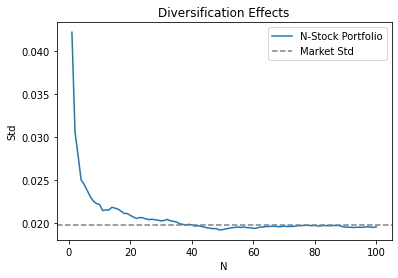

In [39]:
#Get the standard deviation for n stocks
stds = [n_stock_std(stock_returns[:n]) for n in list(range(1, 101))]
n = list(range(1, 101))

#Get the market standard deviation
market_std = np.std(market_returns)

plt.plot(n, stds, label='N-Stock Portfolio')
plt.axhline(market_std, label='Market Std', color='grey', linestyle='--')
plt.legend()
plt.ylabel("Std")
plt.xlabel("N")
plt.title("Diversification Effects")
plt.show()

As you can see, the more stocks we add in, the more our portfolio standard deviation is going to converge to only have market risk!